In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from pysonance.signal import *
from pysonance.const import *
from pysonance.sound import *
from pysonance.control import *
from pysonance.sampler import *

In [14]:
# checkear que se importan bien las librerías
print(SRATE)
print(CHUNK)

48000
1024


### Ejemplos de las señales

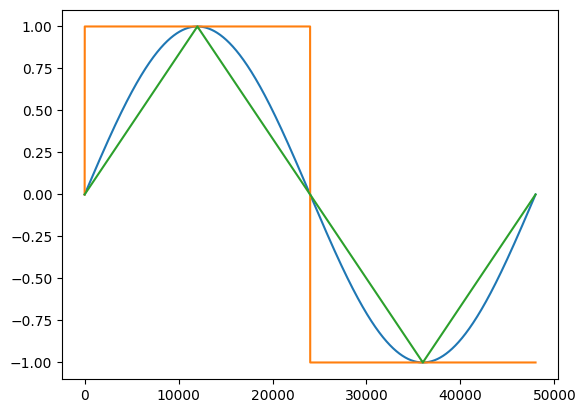

In [15]:
s = Sine(C(1))
c = Square(C(1))
t = Triangle(C(1))
plt.plot(s.next(SRATE))
plt.plot(c.next(SRATE))
plt.plot(t.next(SRATE))
# plt.show()

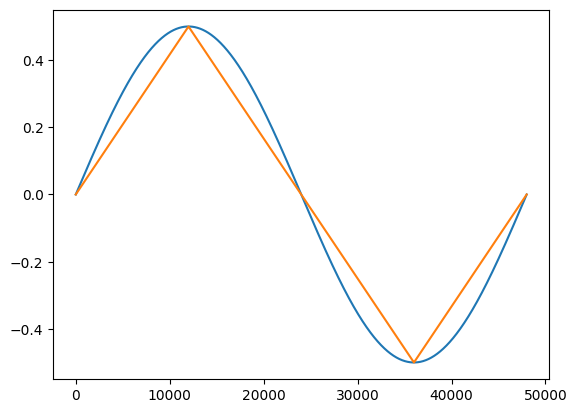

In [16]:
# podemos operar señales con ints/floats o con otras señales
s = Sine(C(1)) / 2
t = Triangle(C(1)) * C(0.5)
plt.plot(s.next(SRATE))
plt.plot(t.next(SRATE))


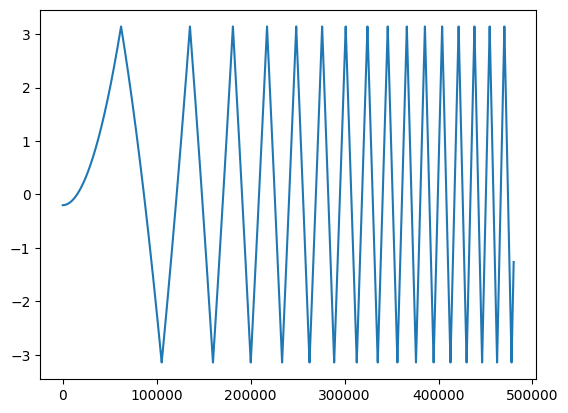

In [17]:
g = Function(np.sin, X(pow=C(2)) - C(.1))
f = Function(np.arcsin, g) * C(2)
plt.plot(f.next(SRATE*10))


podemos hacer señales de varias formas:

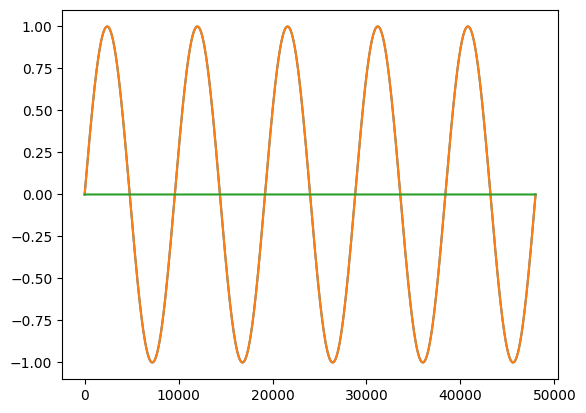

In [18]:
freq = C(5)
v1 = Sine(freq)
v2 = Function(np.sin, X(mul=C(2*np.pi)*freq))
plt.plot(v1.next(SRATE))
plt.plot(v2.next(SRATE))
plt.plot((v1 - v2).next(SRATE))  # la diferencia debe ser 0

ejemplo de uso de pulso gausiano eusando las funciones

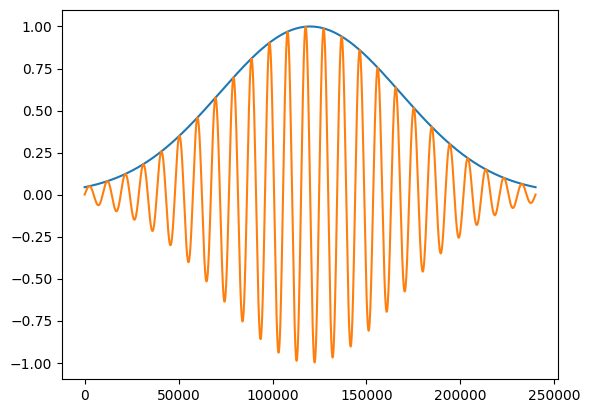

In [19]:
o = C(1)
freq = C(5)

gausian = Function(np.exp, -X(pow=C(2), add=-C(2.5))/(C(2)*o**C(2)))
pulse = gausian * Sine(freq)

plt.plot(gausian.next(SRATE*5))
plt.plot(pulse.next(SRATE*5))



onda modulada en fase por ruido

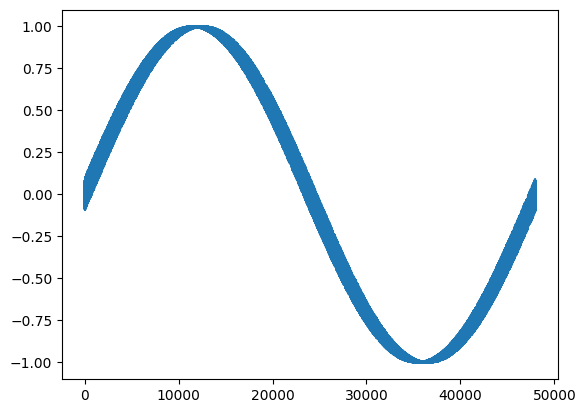

In [20]:
n = Noise(C(.1))

sn = Sine(C(10))
sq = Sine(C(1), phase=Noise(C(.1)))

# plt.plot(n.next(SRATE))
# plt.plot((n+sn).next(SRATE))
plt.plot((sq).next(SRATE))

## Probamos el sampler

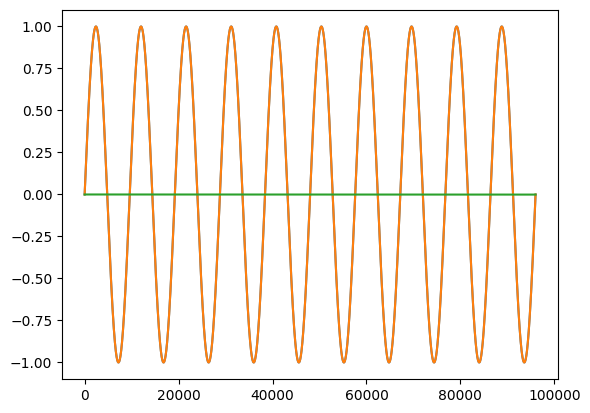

In [21]:
s = Sine(C(5))
sample = s.next(SRATE*2)
sampler = Sampler(sample, loop=True)
samplerx2 = Sampler(sample, speed=2, loop=True)
plt.plot(sample)
plt.plot(sampler.next(SRATE*2))
plt.plot((s - sampler).next(SRATE*2))  # la diferencia debe ser 0


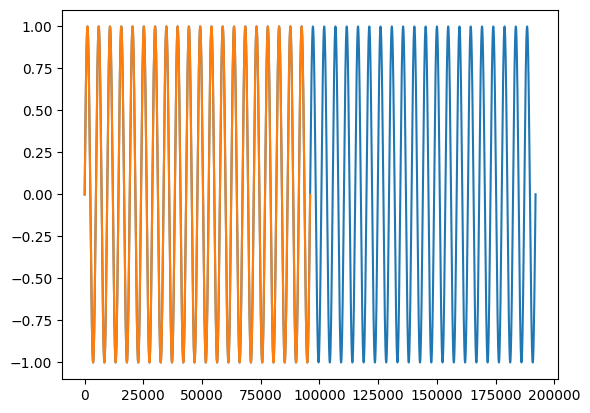

In [22]:
s2 = Sine(C(10))
sampler2 = Sampler(s.next(SRATE*2), speed=2, loop=True)
plt.plot(sampler2.next(SRATE*4))
plt.plot(s2.next(SRATE*2))

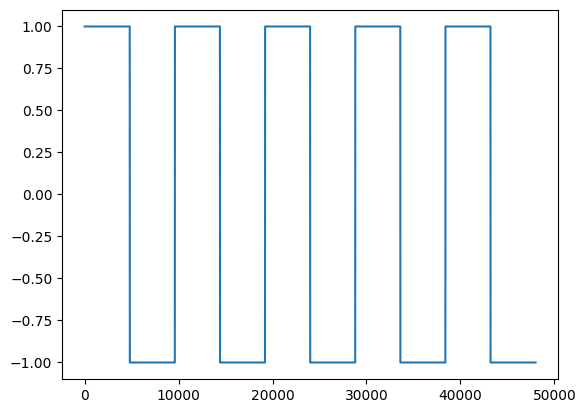

In [23]:
gate = Gate(Sine(5), C(0), C(1), C(-1))
plt.plot(gate.next(SRATE))

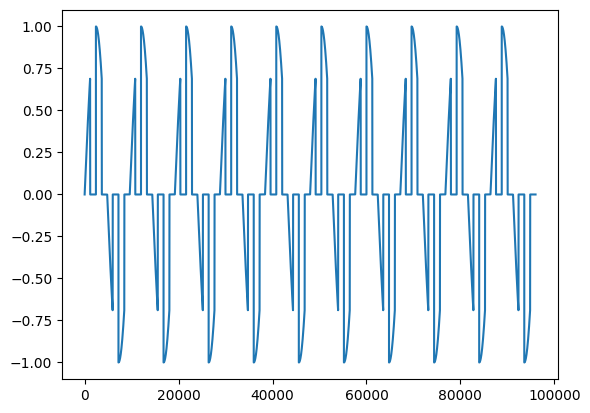

In [24]:
gate = Gate(Sine(20), threshold=Sine(10)*C(.1), true=Sine(5))
plt.plot(gate.next(SRATE*2))

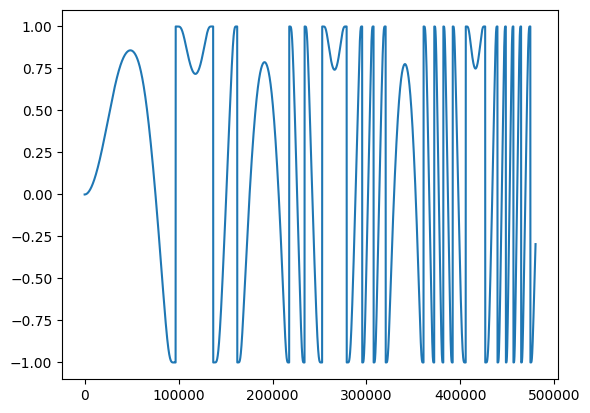

In [25]:
f = Function(np.tan, X()*Function(np.sin, C(2)*X()))
g = Function(np.tanh, f)
plt.plot(g.next(SRATE*10))
